In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#plt.style.use('ggplot')
#Read the file
df = pd.read_csv(r'../youtube-new/USvideos.csv') 
#Drop the unused data
df = df.drop(['video_id',  'title', 'channel_title',
        'tags','thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'] , axis=1)

df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [2]:
from datetime import timedelta 
#import trending date and add 1 day to it, so the publish date becomes always before the trending date.
trending_dates = pd.to_datetime("20"+ df['trending_date'] , format="%Y.%d.%m") + timedelta(days=1)
#import publish_date
publish_times = pd.to_datetime( df['publish_time'] , infer_datetime_format = True)
#Take the difference between the publishing date and trending date "how long does the video take to be in trending"
trending_time = trending_dates-publish_times
# add a coloumn trending time (in second)
df['trending_time'] =  trending_time.dt.total_seconds()
#Drop publish time because we will not use it. We will use trending_time instead
df = df.drop(['publish_time'], axis=1)


In [3]:
#print df.describe()
from sklearn import preprocessing
print df.head()
# List of unique trending date
listDate = df.trending_date.unique().tolist()
#List of dataframes. Each data frame contains one trending date.
dfCopy = df.copy()
dfCopy = dfCopy.drop(['category_id','trending_date'] , axis=1)
dfCopy = dfCopy+1
dfCopy = np.log(dfCopy)
scaler = preprocessing.StandardScaler().fit(dfCopy)
DataFrames = []
for i in listDate:
    temp = df.loc[df.trending_date==i]
    temp = temp.drop(['trending_date'] , axis=1)
    temp = temp.drop(['category_id'] , axis=1)
    temp = temp+1
    temp = np.log(temp)
    temp = scaler.transform(temp)
    temp = pd.DataFrame(temp)
    DataFrames.append(temp)

print len(DataFrames)
#df = df.drop(['trending_date'] , axis=1)
print df.head()


  trending_date  category_id    views   likes  dislikes  comment_count  \
0      17.14.11           22   748374   57527      2966          15954   
1      17.14.11           24  2418783   97185      6146          12703   
2      17.14.11           23  3191434  146033      5339           8181   
3      17.14.11           24   343168   10172       666           2146   
4      17.14.11           24  2095731  132235      1989          17518   

   trending_time  
0       110819.0  
1       145800.0  
2       190476.0  
3       133196.0  
4       194299.0  
205
  trending_date  category_id    views   likes  dislikes  comment_count  \
0      17.14.11           22   748374   57527      2966          15954   
1      17.14.11           24  2418783   97185      6146          12703   
2      17.14.11           23  3191434  146033      5339           8181   
3      17.14.11           24   343168   10172       666           2146   
4      17.14.11           24  2095731  132235      1989          17

          0         1         2         3         4     score  rank  rank2
0  0.109747  0.643114  0.839283  1.113141 -1.842667  0.413561  18.0      0
1  0.795793  0.890954  1.219544  1.002375 -1.507210  0.539832  11.0      1
2  0.957904  1.083426  1.146073  0.788488 -1.180370  0.574732   9.0      2
3 -0.346215 -0.175781  0.060128  0.138116 -1.617768  0.042976  62.0      3
4  0.711954  1.036514  0.630771  1.158601 -1.156071  0.631898   6.0      4
              0         1         2         3         4     score   rank  \
40944  0.584597  0.449108  0.441942  0.241905  1.903679  0.038053  155.0   
40945  0.315971  0.663071 -0.229476  0.432878  1.925745  0.151539  130.0   
40946  0.316879  0.558208  0.288486  0.439744  1.895167  0.051944  151.0   
40947  1.293055  1.215124  0.817730  1.016888  1.940238  0.462894   55.0   
40948  1.643453  1.506038  3.070293  2.185321  1.939951  0.460632   56.0   

       rank2  
40944    195  
40945    196  
40946    197  
40947    198  
40948    199  
hel

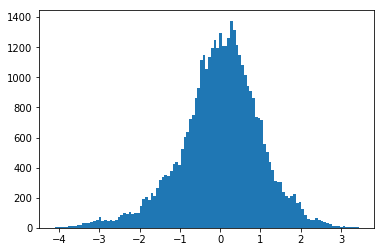

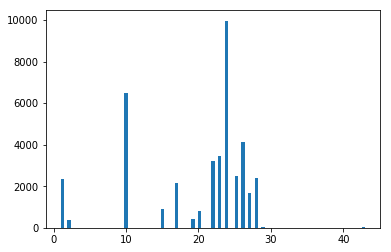

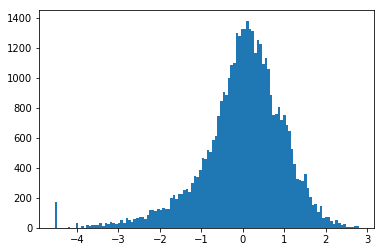

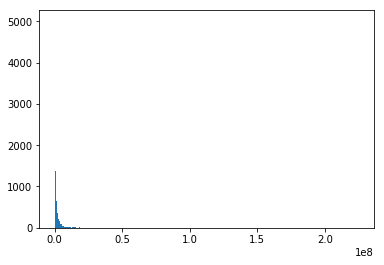

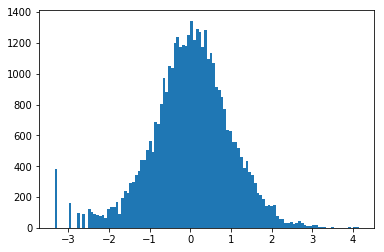

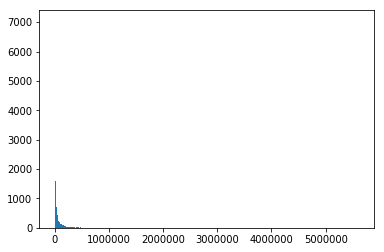

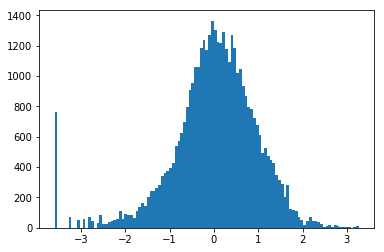

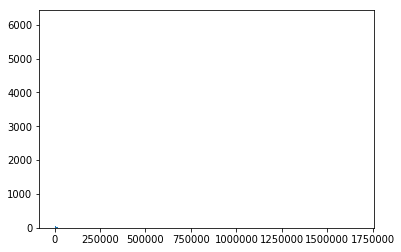

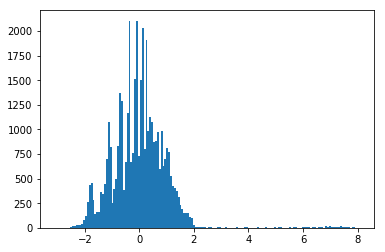

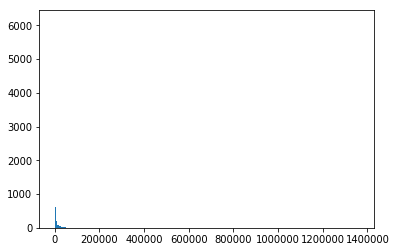

In [47]:
# adding rank to the dataset.
DataFramesTemp = []
for D in DataFrames:
    score = D.iloc[:,0]*0.25 + D.iloc[:,1]*0.25 - D.iloc[:,2]*0.15 + D.iloc[:,3]*0.15 -  D.iloc[:,4]*0.10
    D["score"] = score
    D["rank"] = (-1*D["score"]).rank()
    D["rank2"] = pd.DataFrame({'rank2': [i for i in range(D.shape[0])]})
    DataFramesTemp.append(D)    
df_rank = pd.concat(DataFramesTemp, ignore_index=True)
print df_rank.head()
print df_rank.tail()

for i in range(0):
    print df_rank.iloc[:,i].corr(df_rank['rank2'])
    print df.iloc[:,i+1].corr(df_rank['rank2'])
print "hello"
for i in range(0):
    print df_rank.iloc[:,i].corr(df_rank['rank'])
    print df.iloc[:,i+1].corr(df_rank['rank'])
    
for i in range(5):
    plt.hist(df_rank.iloc[:,i], bins='auto')
    plt.show()    
    plt.hist(df.iloc[:,i+1], bins='auto')
    plt.show()   


-0.2515228823258095
rigid  {'alpha': 1}
-0.2515229171908809
lasso  {'alpha': 1e-08}
-0.25152293055301994
('Coefficients: \n', array([[-0.43547992, -0.44449766,  0.34482278, -0.35060319,  0.22508824]]))
Mean squared error: 0.25
Variance score: 0.75
[[ 0.45254127]
 [-0.84911792]
 [-0.16489348]
 ...
 [-0.57642377]
 [-0.47459822]
 [ 0.23888767]]


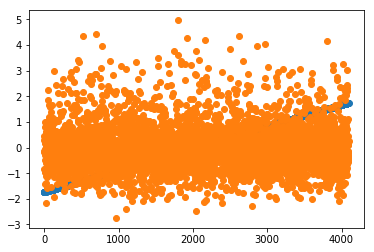

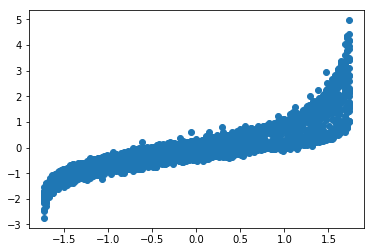

In [18]:
from sklearn import  linear_model
from sklearn.linear_model import  Ridge , Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
ydata = pd.DataFrame(df_rank['rank']) 
scalar2 = preprocessing.StandardScaler().fit(ydata)
ydata = scalar2.transform(ydata)
X_train, X_test, y_train, y_test = train_test_split(df_rank.drop(['score','rank','rank2'] , axis=1), ydata, test_size = 0.1)

regr = linear_model.LinearRegression()
MSEs = cross_val_score(regr , X_train, y_train , scoring='neg_mean_squared_error' , cv=5 )
print np.mean(MSEs)

rigid = Ridge()
parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(rigid, parameters, scoring='neg_mean_squared_error' , cv=5 )
ridge_regressor.fit(X_train, y_train)
print "rigid ",
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

print"lasso ",

lasso = Lasso()
parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error' , cv=5 )
lasso_regressor.fit(X_train, y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

# Train the model using the training sets
#regr =  Ridge(alpha=ridge_regressor.best_params_['alpha']) 
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print y_pred
# Plot outputs
plt.plot( np.sort(y_test[:,0]) , 'o')
#plt.plot( np.sort(y_pred[:,0]) , 'o')
plt.plot( np.sort(y_pred) , 'o')
plt.show()
plt.plot( y_test[:,0],y_pred , 'o' )
#plt.plot(y_test[:,0],y_test[:,0])
plt.show()


#from scipy.optimize import least_squares

In [13]:
print(lasso_regressor.best_params_['alpha'])

1e-08


     views   likes  dislikes  comment_count  trending_time
0   748374   57527      2966          15954       110819.0
1  2418783   97185      6146          12703       145800.0
2  3191434  146033      5339           8181       190476.0
3   343168   10172       666           2146       133196.0
4  2095731  132235      1989          17518       194299.0


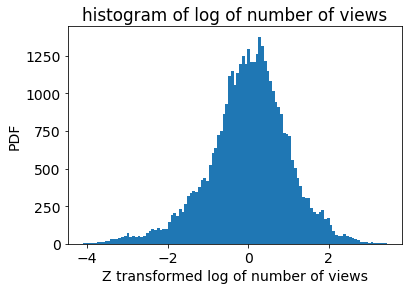

In [31]:
from sklearn import preprocessing

#df.drop(['trending_date','category_id'], axis=1 , inplace=True)
print df.head()
df = df +1
scaler = preprocessing.StandardScaler().fit(pd.DataFrame(np.log(df)))
df_S = scaler.transform(pd.DataFrame(np.log(df)))
df_S = pd.DataFrame(df_S)
plt.rc('font', size=14)          # controls default text sizes

for i in range(1):
    plt.hist(df_S.iloc[:,i], bins='auto')
    #plt.yscale('log')
    #plt.ylim(top=1e4 )
    plt.xlabel('Z transformed log of number of views')
    plt.ylabel('PDF')
    plt.title('histogram of log of number of views')
    plt.show()     



In [44]:
D = DataFrames[0]
score = D.iloc[:,0]*0.25 + D.iloc[:,1]*0.25 - D.iloc[:,2]*0.15 + D.iloc[:,3]*0.15 -  D.iloc[:,4]*0.10
D["score"] = score
D["rank"] = (-1*D["score"]).rank()
#print D



1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29

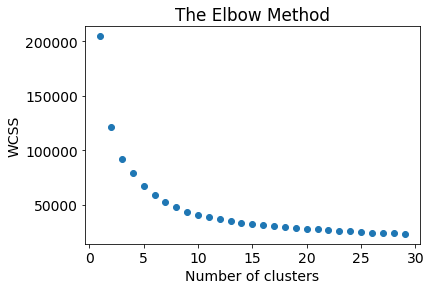

In [33]:
# find the appropriate cluster number
#plt.figure(figsize=(8, 6))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 20)
    kmeans.fit(df_S )
    wcss.append(kmeans.inertia_)
    print i,
plt.plot(range(1, 30), wcss,'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
# Fitting K-Means to the dataset in the normalized format
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
#y_kmeans = kmeans.fit_predict(df_S)
y_kmeans = kmeans.fit_predict(df_S)
y_kmeans1=y_kmeans
#y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
centroids = kmeans.cluster_centers_
#df['cluster'] = cluster

In [12]:
# return the normalized format to the original format.
import numpy as np
print df.columns
C_views= []
C_likes = []
A = []
B = []
for i in range(n_clusters):
    A.append( scaler.inverse_transform(centroids[i,:]) )
    C_views.append(scaler.inverse_transform(centroids[i,:])[1]) 
    C_likes.append(scaler.inverse_transform(centroids[i,:])[2]) 
#print df_S.columns

Index([u'category_id', u'views', u'likes', u'dislikes', u'comment_count',
       u'trending_time', u'cluster'],
      dtype='object')


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


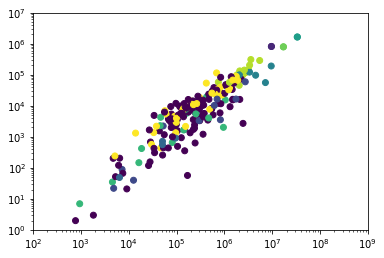

In [14]:
# Draw some of the data and the centeroids in the original format.
rand = np.random.randint(0,40949,200)
#plt.scatter(df['views'].values[rand], df['likes'].values[rand], c=np.transpose(cluster.values)[0][rand])
plt.scatter(df['views'] , df['likes'] , c=np.transpose(cluster.values)[0] )
plt.scatter(C_views, C_likes, linewidths=1 , c=[i for i in range(n_clusters)] )
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e2,1e9])
plt.ylim([1,1e7])


plt.show()

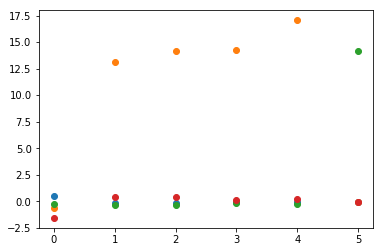

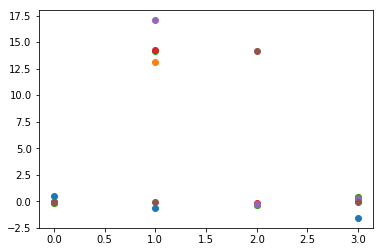

In [26]:
#centroids(clusterNUmber,data_center)
plt.plot(np.transpose(centroids),'o')
plt.show()
plt.plot(centroids[:,:],'o')
plt.show()

In [35]:
# principle component analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
features = ['category_id', 'views', 'likes', 'dislikes', 'comment_count',
       'trending_time', 'cluster']

print df.head()
#df_S = df_rank.drop(['score','rank','rank2'] , axis=1)  #df_S =df_S 
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(df_S)
#print the eignvalues of PCA components
print pca.explained_variance_ratio_
print pca.components_

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_S)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3'])
#principalDf['cluster'] = cluster
#principalDf.head()


     views   likes  dislikes  comment_count  trending_time
0   748375   57528      2967          15955       110820.0
1  2418784   97186      6147          12704       145801.0
2  3191435  146034      5340           8182       190477.0
3   343169   10173       667           2147       133197.0
4  2095732  132236      1990          17519       194300.0
[0.69780285 0.19883645 0.0489077  0.03202667 0.02242633]
[[-0.50091769 -0.50580732 -0.50024931 -0.4853088  -0.08640847]
 [ 0.05926299 -0.07236897 -0.04674222 -0.11347801  0.98802254]
 [ 0.50244723 -0.09399402  0.36031943 -0.7726973  -0.10872302]
 [-0.28944626 -0.61463405  0.70248386  0.20995429  0.02968948]
 [ 0.63979451 -0.59355859 -0.35249415  0.3323495  -0.06035627]]


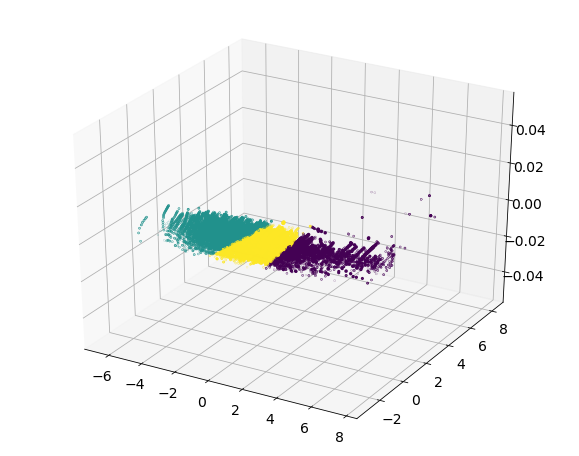

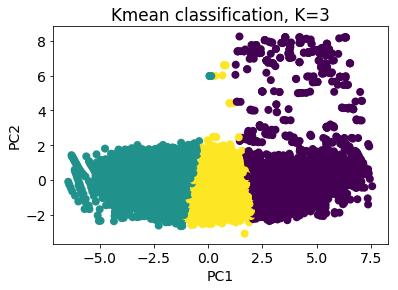

In [38]:
# Draw the classification in the principle component space.
from mpl_toolkits.mplot3d import axes3d
plt.rc('font', size=14)  
fig = plt.figure(figsize=(10, 8)).gca(projection='3d')

#ax = fig.add_subplot(111, projection='3d')
#rand = np.random.randint(0,40949,1000)
rand = np.arange(0,40948)
plt.scatter(principalDf['PC1'].values[rand] , principalDf['PC2'].values[rand], principalDf['PC3'].values[rand]
         , c=np.transpose(cluster.values)[0][rand] , linewidths=2 ,alpha=1)
plt.show()
#plt.xscale('log')
#plt.yscale('log')
#plt.zscale('log')
#plt.xlim([1e2,1e9])
#plt.ylim([1e3,1e10])
plt.scatter(principalDf['PC1'].values[rand] , principalDf['PC2'].values[rand]
         , c=np.transpose(cluster.values)[0][rand] , linewidths=2 ,alpha=1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Kmean classification, K=3")
plt.show()

In [39]:
# classification based on category ID
#print dfTotal.columns
features = ['views', 'likes', 'dislikes', 'comment_count','trending_time']
#X = dfTotal.drop('category_id', axis=1)
#y = dfTotal['category_id']
#pd.DataFrame(data = x, columns = features).head()
#from sklearn import preprocessing


#print df_rank
X = df_rank.drop(['score','rank','rank2'] , axis=1)
y= df_rank['rank'] //67
y = y.astype('int64')
print y.describe()
#break
#scaler = preprocessing.StandardScaler().fit(X)
#X = scaler.transform(X)
#X = pd.DataFrame(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
print "here"
from sklearn.svm import SVC
svclassifier = SVC(max_iter=-1, verbose=True  )
svclassifier.fit(X_train, y_train)
print "here"
y_pred = svclassifier.predict(X_test)
print "here"
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred ,output_dict =False))

count    40949.000000
mean         1.003736
std          0.815236
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: rank, dtype: float64
here
[LibSVM]here
here
[[1201  150    0]
 [ 185 1079  110]
 [   0  251 1119]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1351
           1       0.73      0.79      0.76      1374
           2       0.91      0.82      0.86      1370

   micro avg       0.83      0.83      0.83      4095
   macro avg       0.84      0.83      0.83      4095
weighted avg       0.84      0.83      0.83      4095



In [44]:
#print(confusion_matrix(y_test,y_pred))
y.value_counts()
print(classification_report(y_test,y_pred ,output_dict =False))

np.sqrt(np.var(np.arange(0,200))*0.24)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1351
           1       0.73      0.79      0.76      1374
           2       0.91      0.82      0.86      1370

   micro avg       0.83      0.83      0.83      4095
   macro avg       0.84      0.83      0.83      4095
weighted avg       0.84      0.83      0.83      4095



28.28391769186157

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [21]:
print df_rank.head()
#print dfTotal.head()
X = df_rank.drop(['score','rank','rank2'] , axis=1)
ydata = pd.DataFrame(df_rank['rank']) 
scalar2 = preprocessing.StandardScaler().fit(ydata)
ydata = scalar2.transform(ydata)

          0         1         2         3         4     score  rank  rank2
0  0.109747  0.643114  0.839283  1.113141 -1.842667  0.413561  18.0      0
1  0.795793  0.890954  1.219544  1.002375 -1.507210  0.539832  11.0      1
2  0.957904  1.083426  1.146073  0.788488 -1.180370  0.574732   9.0      2
3 -0.346215 -0.175781  0.060128  0.138116 -1.617768  0.042976  62.0      3
4  0.711954  1.036514  0.630771  1.158601 -1.156071  0.631898   6.0      4


Index([u'category_id', u'views', u'likes', u'dislikes', u'comment_count',
       u'trending_time'],
      dtype='object')


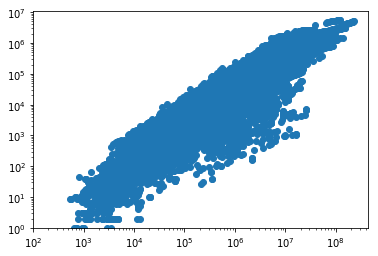

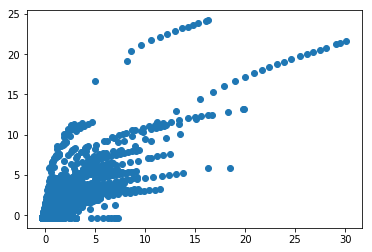

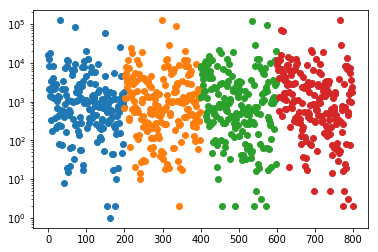

In [28]:
fig, ax = plt.subplots()
print df.columns
ax.scatter(df['views'], df['likes'])
plt.xscale('log')
plt.yscale('log')
plt.xlim(left=1e2)
plt.ylim(bottom=1e0)
plt.show()

X = df_S.iloc[:, [True,True,False,True,True,True]]
plt.scatter( df_S.iloc[:, [False,True,False,False,False,False]], df_S.iloc[:, [False,False,True,False,False,False]] )
plt.show()
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(left=1e2)
#plt.ylim(bottom=1e0)

for i in DataFrames[0:4]:
    plt.plot(i['comment_count'],'o')
#plt.plot(DataFrames[1]['views'],'o')
plt.yscale("log")
plt.show()


(1.0, 11220184.54301963)

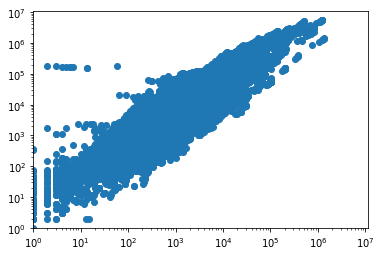

In [38]:
fig, ax = plt.subplots()

ax.scatter(df['comment_count'], df['likes'])
plt.xscale('log')
plt.yscale('log')
plt.xlim(left=1e0)
plt.ylim(bottom=1e0)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, ydata, test_size = 0.25, random_state = 69)
forest = RandomForestRegressor(max_depth = 5)
forest.fit(X_train, y_train)
#plt.plot(forest.predict(X_test),'o')
#plt.plot(y_test.values -forest.predict(X_test),'o')
#plt.yscale('log')
#plt.show()
print forest.score(X_test, y_test)
print mean_squared_error(forest.predict(X_test) ,y_test )

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8398318240964939
0.15950639148457288


0.8975274667699599
0.10210334192970061


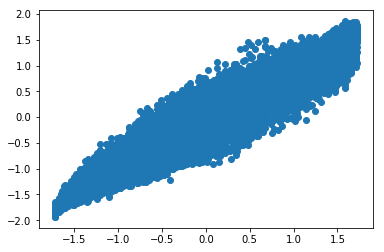

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, ydata, test_size = 0.2)
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor()
nn.fit(X_train, y_train)
print nn.score(X_test, y_test)
print mean_squared_error(y_test, nn.predict(X_test))
plt.scatter(y_test, nn.predict(X_test))
plt.show()

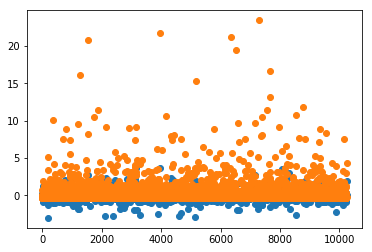

In [81]:
import numpy as np
plt.plot(np.transpose(y_test.values)[0,:] - forest.predict(X_test),'o') #error
plt.plot(np.transpose(y_test.values)[0,:] ,'o')  # true value

plt.show()
#forest.predict(X_test)


In [154]:
# adding rank to the dataset.
DataFramesTemp = []
for D in DataFrames:
    dat1 = pd.DataFrame({'rank': [i//50 for i in range(D.shape[0])]})
    D = D.reset_index(drop=True)
    dat1 = dat1.reset_index(drop=True)
    D = pd.concat([D,dat1],axis=1)
    DataFramesTemp.append(D)    
df_rank = pd.concat(DataFramesTemp, ignore_index=True)
print df_rank.head()
print df_rank.tail()
df_rank = df_rank.drop('trending_date', axis =1)

  trending_date  category_id    views   likes  dislikes  comment_count  \
0      17.14.11           22   748374   57527      2966          15954   
1      17.14.11           24  2418783   97185      6146          12703   
2      17.14.11           23  3191434  146033      5339           8181   
3      17.14.11           24   343168   10172       666           2146   
4      17.14.11           24  2095731  132235      1989          17518   

   trending_time  rank  
0       110819.0     0  
1       145800.0     0  
2       190476.0     0  
3       133196.0     0  
4       194299.0     0  
      trending_date  category_id     views   likes  dislikes  comment_count  \
40944      18.14.06           15   1685609   38160      1385           2657   
40945      18.14.06           22   1064798   60008       382           3936   
40946      18.14.06           24   1066451   48068      1032           3992   
40947      18.14.06            1   5660813  192957      2846          13088   
40948     

In [155]:
print df_rank.columns
X = df_rank.drop(['rank','category_id'], axis=1)
y = df_rank['rank']
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)


#pd.DataFrame(data = x, columns = features).head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print X_train.head()
from sklearn.svm import SVC
svclassifier = SVC(verbose=True)
svclassifier.fit(X_train, y_train)
print "here"
y_pred = svclassifier.predict(X_test)
print "here"
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred ,output_dict =False))


Index([u'category_id', u'views', u'likes', u'dislikes', u'comment_count',
       u'trending_time', u'rank'],
      dtype='object')
              0         1         2         3         4
26652 -0.199849 -0.324475 -0.127850 -0.225669 -0.061658
24001 -0.235450 -0.215874 -0.117171 -0.153535 -0.087063
36482 -0.159633 -0.231275 -0.107836 -0.182896 -0.028076
34055  0.097465 -0.012774 -0.026987 -0.079931 -0.054051
919   -0.313959 -0.315934 -0.126782 -0.215864 -0.088000
[LibSVM]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


here
here
              precision    recall  f1-score   support

           0       0.62      0.91      0.74      2021
           1       0.37      0.50      0.43      2095
           2       0.50      0.30      0.38      2115
           3       0.69      0.43      0.53      1959

   micro avg       0.53      0.53      0.53      8190
   macro avg       0.55      0.53      0.52      8190
weighted avg       0.55      0.53      0.52      8190



In [156]:
X = df_rank.drop(['rank','category_id'], axis=1)
y = df_rank['rank']
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)

y = pd.DataFrame(y)
scaler = preprocessing.StandardScaler().fit(y)
y = scaler.transform(y)
y = pd.DataFrame(y)
print 'here'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor()
nn.fit(X_train, y_train)
nn.score(X_test, y_test)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


here


0.6667035586409031

In [140]:
[i//5 for i in range(25)]

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]

/home/mkohler/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

0.885304711589727

In [49]:
capitals = []
words = []
for title in df['title']:
    
    num_capitals = 0
    for letter in title:
        if letter.isupper():
            num_capitals += 1
    capitals.append(num_capitals)
    
    words_list = title.split()
    words.append(len(words_list))

title_properties = pd.DataFrame({'num_capitals':capitals,'num_words':words})
title_properties.describe()


,num_capitals,num_words
count,40949.000000,40949.000000
mean,10.136047,8.519060
std,8.731367,3.502857
min,0.000000,1.000000
25%,5.000000,6.000000
50%,8.000000,8.000000
75%,12.000000,11.000000
max,77.000000,23.000000


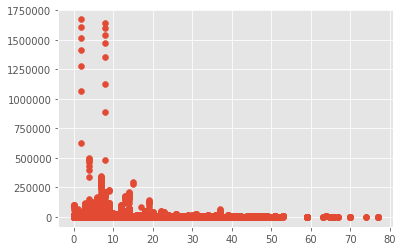

In [61]:
#correlation is lacking here ... idk
fig, ax = plt.subplots()

ax.scatter(title_properties['num_capitals'], df['dislikes'])


In [ ]:
date = df['']

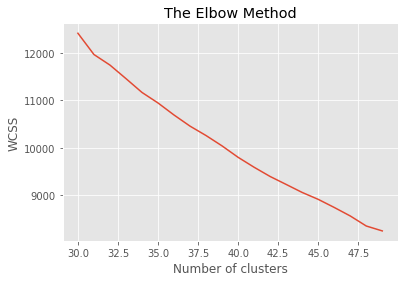

In [100]:
plt.plot(range(30, 50), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()